# How to evaluate and monitor performance of AI models for Financial Risk Management- a practical guide

## Let's talk Precision, Recall, F1 score, Reject Rate, PSI, CSI, KS and Gini along with their python implementation

##  Here are the metrics we will be covering:
 - Accuracy, Precision, Recall and Reject Rate
 - F1 Score
 - ROC AUC
 - Gini Coefficient
 - Population Stability Index (PSI)
 - Character Stability Index (CSI)
 - Kolmogorov Smirnoff Test (KS)


 

##  Data: Bank Marketing


**Abstract:** 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
 

##  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

# Step 1: Import Libraries and Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read Dataset
bank = pd.read_csv('bank-additional-full.csv', sep = ';')
# Get Y variable
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Step 2: EDA

In [3]:
# Basic Info
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Step 3: Data Preparation

In [6]:
# Transform vars

# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank['job']      = labelencoder_X.fit_transform(bank['job']) 
bank['marital']  = labelencoder_X.fit_transform(bank['marital']) 
bank['education']= labelencoder_X.fit_transform(bank['education']) 
bank['default']  = labelencoder_X.fit_transform(bank['default']) 
bank['housing']  = labelencoder_X.fit_transform(bank['housing']) 
bank['loan']     = labelencoder_X.fit_transform(bank['loan']) 
bank['contact']  = labelencoder_X.fit_transform(bank['contact']) 
bank['month']    = labelencoder_X.fit_transform(bank['month']) 
bank['day_of_week'] = labelencoder_X.fit_transform(bank['day_of_week']) 


#Function to creat group of ages
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank)

#Function to creat group of duration
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank)


bank['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)


In [7]:
# Select columns
bank_final= bank.copy()
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [8]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = .2, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
39577,4,5,1,2,0,0,0,0,6,3,2,-1.8,93.876,-40.0,0.668,5008.7,1,999,2,2
10104,3,9,1,6,0,2,0,1,4,2,4,1.4,94.465,-41.8,4.958,5228.1,1,999,0,1
17235,2,7,1,3,0,0,0,0,3,0,4,1.4,93.918,-42.7,4.962,5228.1,4,999,0,1
20926,1,0,2,6,0,2,0,0,1,2,4,1.4,93.444,-36.1,4.964,5228.1,1,999,0,1
17626,3,2,1,2,0,2,0,0,3,1,2,1.4,93.918,-42.7,4.962,5228.1,5,999,0,1


In [9]:
# Normalise the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
X_train_v2 = pd.DataFrame(X_train, columns = bank_final.columns)
X_test_v2 = pd.DataFrame(X_test, columns = bank_final.columns)
X_train_v2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,2.751136,0.358486,-0.283543,-0.814582,-0.515651,-1.088249,-0.452702,-0.756235,0.761906,0.717881,-0.455583,-1.189114,0.521856,0.114708,-1.693243,-2.186779,-0.567177,0.196667,3.680103,1.805911
1,1.389760,1.472626,-0.283543,1.055606,-0.515651,0.941572,-0.452702,1.322340,-0.100728,0.001500,1.163252,0.844048,1.537065,-0.274370,0.775744,0.849549,-0.567177,0.196667,-0.351730,-0.374869
2,0.028384,0.915556,-0.283543,-0.347035,-0.515651,-1.088249,-0.452702,-0.756235,-0.532045,-1.431261,1.163252,0.844048,0.594248,-0.468910,0.778046,0.849549,0.522848,0.196667,-0.351730,-0.374869
3,-1.332991,-1.034189,1.354961,1.055606,-0.515651,0.941572,-0.452702,-0.756235,-1.394678,0.001500,1.163252,0.844048,-0.222745,0.957712,0.779197,0.849549,-0.567177,0.196667,-0.351730,-0.374869
4,1.389760,-0.477119,-0.283543,-0.814582,-0.515651,0.941572,-0.452702,-0.756235,-0.532045,-0.714880,-0.455583,0.844048,0.594248,-0.468910,0.778046,0.849549,0.886190,0.196667,-0.351730,-0.374869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,-1.332991,0.915556,-1.922048,-0.347035,-0.515651,0.941572,2.309877,-0.756235,-0.532045,-1.431261,-1.265000,0.844048,0.594248,-0.468910,0.776319,0.849549,-0.203835,0.196667,-0.351730,-0.374869
32946,1.389760,-0.477119,-0.283543,-0.814582,-0.515651,0.941572,-0.452702,1.322340,0.761906,-0.714880,0.353835,0.653439,0.725243,0.892865,0.717616,0.336114,-0.203835,0.196667,-0.351730,-0.374869
32947,0.028384,2.029696,-0.283543,-0.814582,-0.515651,-1.088249,-0.452702,1.322340,-0.100728,-0.714880,1.163252,0.844048,1.537065,-0.274370,0.722220,0.849549,-0.203835,0.196667,-0.351730,-0.374869
32948,0.028384,-0.755654,-0.283543,1.523153,1.937879,-1.088249,2.309877,-0.756235,-0.532045,0.717881,-1.265000,0.844048,0.594248,-0.468910,0.777470,0.849549,6.699655,0.196667,-0.351730,-0.374869


## Step 4: Model Fit

In [11]:
rfc = RandomForestClassifier(n_estimators = 200, random_state=101)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
rfcpred_prob = rfc.predict_proba(X_test)
rfcpred_prob_train = rfc.predict_proba(X_train)
rfc

RandomForestClassifier(n_estimators=200, random_state=101)

## Step 5: Model Monitoring

1. Accuracy, Precision, Recall and Reject Rate
2. F1 Score
3. ROC AUC
4. Gini Coefficient
5. Population Stability Index (PSI)
6. Character Stability Index (CSI)
7. Kolmogorov Smirnoff Test (KS)

Sklearn link: https://scikit-learn.org/stable/modules/model_evaluation.html

In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

In [13]:
# Manual User Inputs

y_test = y_test
y_pred = rfcpred
y_pred_prob = rfcpred_prob[:,1]
y_pred_prob_train = rfcpred_prob_train[:,1]

Confusion Matrix: 
 
            Pred - 0  Pred - 1
Actual - 0      6985       294
Actual - 1       513       446
 
Accuracy: 0.902
Recall: 0.465
Reject_rate: 0.09
Precision: 0.603
F1_score: 0.525
ROC_AUC_score: 0.932
Gini: 0.863


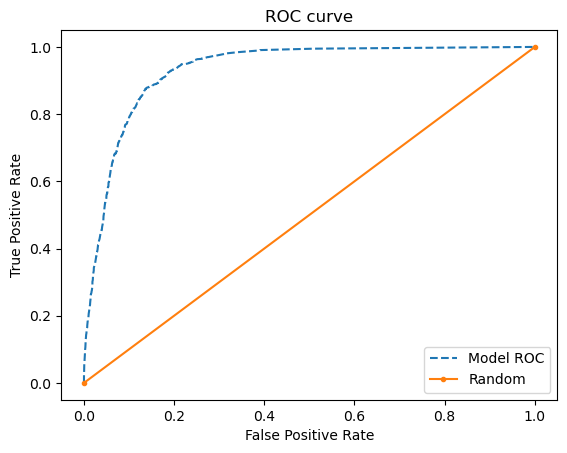

In [14]:
# Confusion Matrix, Accuracy, recall, precision, F1 Score, Roc_auc_score and Gini

def metrics_actual_y(y_test, y_pred,y_pred_prob):
    
    '''
    This function calculates Confusion Matrix, Accuracy, recall, precision, F1 Score, Roc_auc_score and Gini 
    given following inputs:
    
    y_test = Ground truth (correct) labels
    y_pred = Predicted labels, as returned by a classifier
    y_pred_prob = numpy array of predicted probabilities of target class
    
    '''
    
    
    # Confusion Matrix


    # Order of the input parameters is important: 
    # first param is the actual output values
    # second param is what our model predicted
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  columns = ["Pred - 0","Pred - 1"], 
                                  index = ["Actual - 0","Actual - 1"])

    
    true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    reject_rate = (false_pos+true_pos)/(true_neg + false_pos + false_neg + true_pos)
    precision = precision_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    gini = (2*roc_auc) - 1
    
    print("Confusion Matrix: "," ",conf_matrix_df.head()," ",
        'Accuracy: {}'.format(accuracy.round(3)),
          'Recall: {}'.format(recall.round(3)),
          'Reject_rate: {}'.format(reject_rate.round(3)),
          'Precision: {}'.format(precision.round(3)),
          'F1_score: {}'.format(F1_score.round(3)),
          'ROC_AUC_score: {}'.format(roc_auc.round(3)),
          'Gini: {}'.format(gini.round(3)),sep='\n')
    
    
    # Plot ROC Curve

    #fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (25,15))
     
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    # plot the roc curve for the model
    plt.plot(fpr, tpr, linestyle='--', label='Model ROC')
    plt.plot([0, 1], [0, 1], marker='.', label='Random')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # Title
    plt.title('ROC curve')
    # show the plot
    plt.show()
    
    
    
    
    metrics_actual_y_df = pd.DataFrame(data = [["accuracy",accuracy],["recall",recall],
                                               ["reject_rate",reject_rate],
                                                ["precision",precision],["F1_score",F1_score],
                                                ["roc_auc",roc_auc],["gini",gini]],
                                       columns = ["metric","score"])
    return metrics_actual_y_df, conf_matrix_df
    
metrics_actual_y_df, conf_matrix_df = metrics_actual_y(y_test, y_pred,y_pred_prob)

In [15]:
# PSI

def psi_csi(y_pred_prob_train, y_pred_prob, num_bins = 10, csi = False):
    
    '''
    This function calculates PSI CSI(for individual vars):
    
    y_pred_prob_train = numpy array of predicted probabilities of target class in training data
    y_pred_prob = numpy array of predicted probabilities of target class
    num_bins = number of bins
    csi = calcukate CSI? (Bool)
    
    
    '''
    
 
    # Sort the data
    y_pred_prob_v2 = y_pred_prob.copy()
    y_pred_prob_train.sort()
    y_pred_prob_v2.sort()
    
    # If very few categories, bining not needed, else do bining
    
    if len(np.unique(y_pred_prob_train))<=20:
        df_initial = pd.DataFrame({'initial': y_pred_prob_train, 'bin': y_pred_prob_train})
        df_new = pd.DataFrame({'new': y_pred_prob_v2, 'bin': y_pred_prob_v2})
        bins = np.unique(y_pred_prob_train)
        
    else:
        bins = pd.qcut(y_pred_prob_train, q = num_bins, retbins = True, duplicates="drop")[1]
        if csi == False:
            bins[0] = 0 - 1e-4 # Correct the lower boundary
            bins[-1] = 1 # Correct the higher boundary
            
        # Bucketize the initial population and count the sample inside each bucket
        bins_initial = pd.cut(y_pred_prob_train, bins = bins, labels = range(1,len(bins)))
        df_initial = pd.DataFrame({'initial': y_pred_prob_train, 'bin': bins_initial})
        
        # Bucketize the new population and count the sample inside each bucket
        bins_new = pd.cut(y_pred_prob_v2, bins = bins, labels = range(1,len(bins)))
        df_new = pd.DataFrame({'new': y_pred_prob_v2, 'bin': bins_new})
        
            
        
        
    
    
    
    grp_initial = df_initial.groupby('bin').count()
    grp_initial['percent_initial'] = grp_initial['initial'] / sum(grp_initial['initial'])
    
    
    grp_new = df_new.groupby('bin').count()
    grp_new['percent_new'] = grp_new['new'] / sum(grp_new['new'])
    
    # Compare the bins to calculate PSI
    psi_csi_df = grp_initial.join(grp_new, on = "bin", how = "inner")
    
    # Add a small value for when the percent is zero
    psi_csi_df['percent_initial'] = psi_csi_df['percent_initial'].apply(lambda x: eps if x == 0 else x)
    psi_csi_df['percent_new'] = psi_csi_df['percent_new'].apply(lambda x: eps if x == 0 else x)
    
    # Calculate the psi
    psi_csi_df['psi'] = (psi_csi_df['percent_initial'] - psi_csi_df['percent_new']) * np.log(psi_csi_df['percent_initial'] / psi_csi_df['percent_new'])
    psi_csi  = psi_csi_df['psi'].sum()
    
    if csi == False:
        print('PSI: ', psi_csi)
    else:
        print('CSI: ', psi_csi)
    # Return the psi values
    return psi_csi_df, psi_csi, bins



psi_csi_df, psi, bins = psi_csi(y_pred_prob_train, y_pred_prob, num_bins = 10, csi = False)

psi_csi_df.head(n=50)

PSI:  0.17360831984948688


,initial,percent_initial,new,percent_new,psi
bin,,,,,
1,20599,0.625159,4440,0.538966,0.012787
2,2490,0.075569,734,0.089099,0.002228
3,3376,0.102458,889,0.107915,0.000283
4,3202,0.097178,1841,0.223477,0.105178
5,3283,0.099636,334,0.040544,0.053132


In [16]:
# CSI


def CSI(X_train, X_test):
    
    
    '''
    This function calculates CSI for all vars:
    
    
    X_train = Training data of x vars
    X_test = Test data of x vars
    
 
    '''
    
    CSI_master_df = pd.DataFrame()
    CSI_metric_df  = pd.DataFrame()
    CSI_bin_df = pd.DataFrame()
    
    for i in X_train.columns:
        
        # Sort the data
        X_test = X_test.sort_values(i)
        X_train = X_train.sort_values(i)
        
        csi_var_test = X_test[i].values
        csi_var_train = X_train[i].values
        
        print('CSI for variable: ', i)
        csi_df, csi, bins = psi_csi(csi_var_train, csi_var_test, num_bins = 10, csi = True)
        print('Bins :')
        print(bins)
        
        csi_df['Variable'] = i
        csi_metric_temp = pd.DataFrame([[i,csi]], columns = ['Variable', 'CSI'])
        csi_bin_temp = pd.DataFrame([[i,bins]], columns = ['Variable', 'CSI_bins'])
        CSI_master_df = pd.concat([csi_df, CSI_master_df])
        CSI_metric_df = pd.concat([csi_metric_temp,CSI_metric_df])
        CSI_bin_df = pd.concat([csi_bin_temp,CSI_bin_df])
        
    return CSI_master_df, CSI_metric_df, CSI_bin_df
        
        
        
        
        
        
        
CSI_master_df, CSI_metric_df, CSI_bin_df = CSI(X_train_v2, X_test_v2)       
        
        
CSI_metric_df        

CSI for variable:  age
CSI:  0.000708718245565204
Bins :
[-1.33299134  0.02838437  1.38976009  2.7511358 ]
CSI for variable:  job
CSI:  0.0009715773896017714
Bins :
[-1.03418921 -0.75565417 -0.47711912 -0.19858408  0.07995097  0.35848602
  0.63702106  0.91555611  1.19409115  1.4726262   1.75116125  2.02969629]
CSI for variable:  marital
CSI:  0.0006783383558998303
Bins :
[-1.92204762 -0.2835433   1.35496103  2.99346535]
CSI for variable:  education
CSI:  0.0006518073329982753
Bins :
[-1.74967523 -1.28212839 -0.81458154 -0.3470347   0.12051215  0.588059
  1.05560584  1.52315269]
CSI for variable:  default
CSI:  0.00030653505152763413
Bins :
[-0.51565089  1.93787935  4.39140959]
CSI for variable:  housing
CSI:  1.608598137321136e-05
Bins :
[-1.08824894 -0.07333845  0.94157204]
CSI for variable:  loan
CSI:  1.56414067171267e-05
Bins :
[-0.45270246  0.9285871   2.30987665]
CSI for variable:  contact
CSI:  0.00021934273493561925
Bins :
[-0.75623541  1.32233956]
CSI for variable:  month
CSI:

,Variable,CSI
0,poutcome,0.000491
0,previous,0.000971
0,pdays,0.000000
0,campaign,0.001467
0,nr.employed,0.002957
0,euribor3m,0.002298
0,cons.conf.idx,0.002289
0,cons.price.idx,0.003015
0,emp.var.rate,0.002295
0,duration,0.001170


In [17]:
# KS Statistics

def kolmogorov_stat(y_test, y_pred_prob,num_bins):
    
    '''
    This function calculates KS statistics:
        
    y_test = Ground truth (correct) labels
    y_pred_prob = numpy array of predicted probabilities of target class
    num_bins = number of bins
    
    
 
    '''
    
    y_test_v2 = y_test.copy()
    y_test_v2.columns = ['target']
    data = pd.concat([pd.DataFrame(y_pred_prob, columns = ['prob']).reset_index(drop=True),y_test_v2.reset_index(drop=True)],
              axis=1)
    data['target0'] = 1 - data["target"]
    
    bins = pd.qcut(y_pred_prob, q = num_bins, retbins = True, duplicates="drop")[1]
    bins[0] =  0.0 - 1e-4 # Correct the lower boundary
    bins[-1] = 1.0 # Correct the higher boundary


    # Bucketize the initial population and count the sample inside each bucket
    data['bucket'] = pd.cut(y_pred_prob, bins = bins, labels = range(1,len(bins)))   
    
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()["prob"]
    kstable['max_prob'] = grouped.max()["prob"]
    kstable['events']   = grouped.sum()["target"]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data["target"].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data["target"].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3)
    ks = max(kstable['KS'])

    
    #Display KS
    print("KS is " + str(max(kstable['KS']))+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    kstable.head(n=50)
    return kstable, ks, bins


kstable, ks, bins = kolmogorov_stat(y_test, y_pred_prob,10)
kstable

KS is 0.731 at decile 2


,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
0,0.472500,0.97500,496,328,51.72%,4.51%,0.517205,0.045061,0.472
1,0.195000,0.47125,298,519,31.07%,7.13%,0.827946,0.116362,0.712
2,0.060333,0.19000,110,692,11.47%,9.51%,0.942649,0.211430,0.731
3,0.015909,0.06000,36,731,3.75%,10.04%,0.980188,0.311856,0.668
4,0.005667,0.01500,10,578,1.04%,7.94%,0.990615,0.391263,0.599
5,0.000000,0.00500,9,4431,0.94%,60.87%,1.000000,1.000000,0.000
